## Linear Regression이란?

#### <span style="color:red">딥러닝의 딥은 통계의 결과들이 무수히 얽혀있는 즉 연산들이 복잡하다는 뜻의 Deep이다.</span>
<span style="color:red">이 연산중에서 가장 기본이 되는 연산이 바로 Linear Regression 선형회귀다.</span>
여기서는 과연 선형회귀가 어떤 것인지 차근차근 살펴보겠다

학생들과 성적의 관계
학생들마다 다 다양한 성적 분포를 가지는데...여기에 어떤 연관이 있는지 알아내고
그 연관 관계를 이용해서 결국에는 특정학생의 성적을 예측해보자.
학생들의 기말고사 성적은 [      ]에 따라 다르다

[     ]안에 시험성적을 좌우할 만한 요소들로 무엇이 있을까?
여기서 [     ]안에 들어갈 내용을 '정보'라 한다. 머신러닝과 딥러닝은 이 정보가 필요하다. 
정보를 정확히 준비해 놓기만 하면 성적을 예측하는 방정식을 만들수 있다.

이것을 수학적으로 정의하면, 성적을 변하게 하는 '정보' 요소를 X라 하고, 이 값에 따라 변하는 '성적'을 Y라 한다. 'X값이 변함에 따라 Y값도 변한다'는 정의 안에서 독립적으로 변할수 있는 값 X를 독립변수라 한다.
또한, 이 독립 변수에 따라 종속적으로 변하는 Y를 종속변수라 한다.
<span style="color:red">선형회귀는 독립변수 X를 이용해서 종속변수 Y를 예측하고 설명하는 작업을 말한다.</span>

### 예측선 그리기

기말고사를 준비하는 학생들을 대상으로 자료를 조사한 결과를 바탕으로 공부한 시간을 통해서 시험성적을 예측하자. <br/>
     X = [2,  4,  6,  8] <br/> 
     Y = [81, 93, 91, 97]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

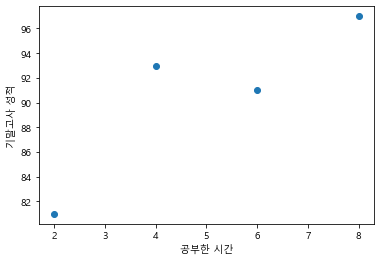

In [4]:
X = [2, 4, 6, 8]
Y = [81, 93, 91, 97]

plt.scatter(X,Y)

plt.xlabel("공부한 시간")
plt.ylabel("기말고사 성적")

plt.show()

왼쪽이 아래로 향하고 오른쪽이 위를 향하는 선형(직선으로 표시되는 형태의 그래프)을 보인다. 선형회귀는 이 점들의 특징을 가장 잘 나타내는 선을 그리는 과정이다.  여기서 선은 곧 일차함수 그래프이며 다음과 같은 공식으로 표현된다.<br>
      <span style="color:red">y = ax + b</span>
      <br>
여기서 x값은 독립변수이고 y값은 종속변수이다. 즉, x 값에 따라서 y값은 반드시 달라진다. 다만, 정확하게 계산하려면 상수 a와 b의 값을 알아야한다.<br>

따라서 선형회귀문제는 결과적으로 a와 b값을 알아내는 문제이다.

### 최소제곱법
    일차함수의 기울기 a와 절편 b를 구할수 있다
    
    a = (x-x평균)(y-y평균)의 합 / (x-x평균)**의 합
    b = y의 평균-(x의 평균x기울기a)
    
    a = 2.3    b = 79

### <span style="color:red"><center>y = 2.3x + 79</center></span>

In [5]:
'''
최소제곱근 공식으로 기울기 a와 y의 절편 b값을 구할 수 있다.
mean() 함수를 바로 이용하자.
'''

mx = np.mean(X)
my = np.mean(Y)

# 최소제곱근 공식 중에서 분모의 값
divisor = sum([(i-mx)**2 for i in X])

# 분자에 해당하는 값을 구하는 함수 정의 부분
def top(X,mx,Y,my):
    d = 0
    for i in range(len(X)):
        d +=(X[i] - mx) * (Y[i]- my)
    return d
dividend = top(X,mx,Y,my)

a = dividend/divisor

b = my-(mx*a)

print(a)
print(b)

2.3
79.0


In [ ]:
a = 2.3
b = 79

In [6]:
X = np.array(X)
Y = np.array(Y)
print(Y)

predict = a*X + b
predict

[81 93 91 97]


array([83.6, 88.2, 92.8, 97.4])

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

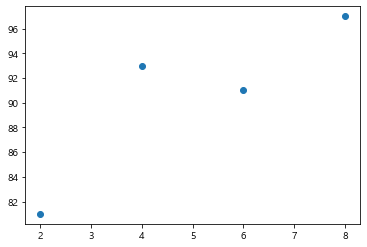

In [7]:
plt.scatter(X,Y)
plt.plot(X.predict,c="r")
plt.xlabel("공부한 시간")
plt.ylabel("기말고사 성적")
plt.show()

### 평균제곱 오차 
<span style="color:red">
   $$
   \frac{1}{n}\sum(pred_i - y_i)^2
   $$
</span>

#### 평균제곱 오차가 작다는 것은 실제값과 예측값 사이의 간극이 크지 않다는 것을 말한다.
    앞으로 딥러닝과 머신러닝을 공부할때 굉장히 많이 나오는 공식으로 이 값이 작으면 작을수록 예측한값의
    정확도가 높아짐을 의미한다.
#### 선형회귀란 임의의 직선을 그어서 이에 대한 평균제곱 오차를 구하고 이 값을 가장 작게 만들어주는  a와 b값을 찾아가는 작업이다.


In [8]:
def mse(y_hat, y):
    return ((y_hat - y) ** 2).mean()

In [10]:
mse(predict,Y)

8.299999999999985

### MSE 실습하기

In [18]:
data = [[2,81],[4,94],[6,93],[8,97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

print(x)
print(y)

[2, 4, 6, 8]
[81, 94, 93, 97]


In [19]:
# 임의로 a,b 값을 지정해보자
temp_a_b = [3,76]

In [20]:
# 일차방정식 Y = aX + b 를 반환하는 함수 정의
def predict(x):
    return temp_a_b[0]*x + temp_a_b[1]

In [21]:
# 평균제곱근(MSE)공식을 그대로 파이썬 함수로 정의.
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

In [22]:
# MSE() 함수에 값을 입력하여 최종값을 구하는 함수를 정의
def mse_val(predict_result, y): 
    return mse(np.array(predict_result), np.array(y))

In [23]:
predict_result = [] # 예측값이 들어갈 빈 리스트
for i in range(len(x)): # 모든 x값을 한번씩 다 i에 대입한다.
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" %(x[i],y[i],predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=94, 예측점수=88
공부시간=6, 실제점수=93, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [24]:
print("MSE 최종값 : "+ str(mse_val(predict_result,y)))

MSE 최종값 : 11.75


#### MSE 함수에 의해서 발생한 오차를 앞으로 어떻게 줄여갈 수 있을까?...
    미분/편미분 사용
    경사하강법을 사용한다.